In [38]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Input
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
# fashion_mnist.load_data() downloads the dataset (60,000 training, 10,000 test images).
# Each image is 28×28 grayscale pixels.
# Labels (y_train, y_test) are integers from 0–9 representing clothing categories.

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [39]:
# Preprocess the Data
# Normalization scales pixel intensities (0–255 → 0–1). This speeds up training.
# CNN layers expect 3D inputs per image → height, width, and channels.
# Since images are grayscale, we add a channel dimension → (28,28,1).

import tensorflow as tf

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


In [40]:
# Build CNN Model
# Conv2D: Extracts patterns/features (edges, textures).
# MaxPooling2D: Reduces spatial size, keeps important features.
# Flatten: Converts 2D feature maps into a 1D vector.
# Dense (128): Fully connected layer learns complex combinations of features.
# Dropout: Randomly turns off neurons during training to reduce overfitting.
# Dense (10, softmax): Output probabilities for 10 categories.

model = Sequential([
    Input(shape=(28,28,1)),              # Explicit Input layer
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Compile the Model
# Metric = accuracy: Easy-to-understand performance metric.

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [44]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test, y_test))


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8478 - loss: 0.4224 - val_accuracy: 0.8676 - val_loss: 0.3602
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8665 - loss: 0.3691 - val_accuracy: 0.8821 - val_loss: 0.3208
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8794 - loss: 0.3362 - val_accuracy: 0.8882 - val_loss: 0.3074
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8877 - loss: 0.3106 - val_accuracy: 0.8969 - val_loss: 0.2850
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8948 - loss: 0.2890 - val_accuracy: 0.8976 - val_loss: 0.2864
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8997 - loss: 0.2737 - val_accuracy: 0.9000 - val_loss: 0.2740
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9051 - loss: 0.2608 - val_accuracy: 0.9049 - val_loss: 0.2591
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9110 - loss: 0.2448 - 

In [35]:
# Evaluate the Model
# After training, we test the model on unseen test data.
# Prints the final accuracy (how many images were classified correctly).

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}")


✅ Test Accuracy: 0.9102


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


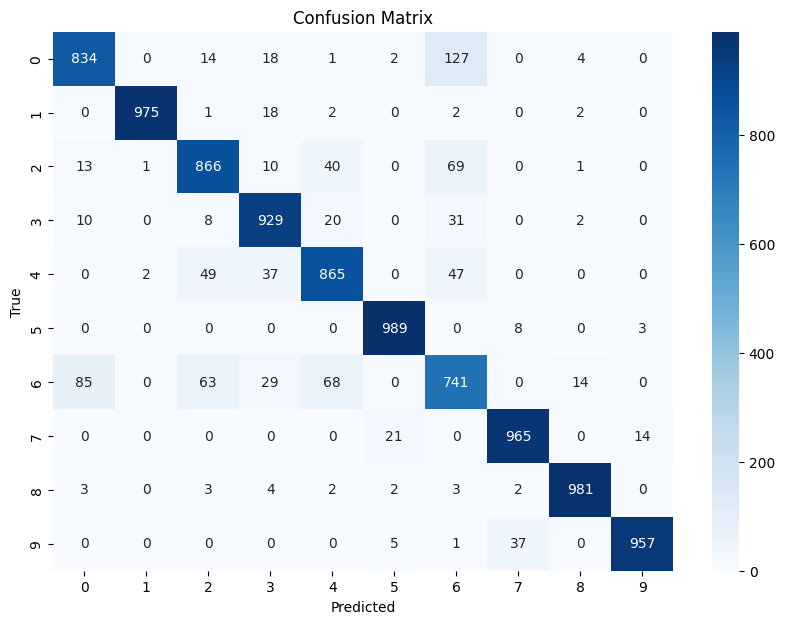

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.86      0.87      0.86      1000
           3       0.89      0.93      0.91      1000
           4       0.87      0.86      0.87      1000
           5       0.97      0.99      0.98      1000
           6       0.73      0.74      0.73      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [36]:
# 7. Confusion Matrix & Report

import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred))
